## Visualising the global gridded data set of GDP and electricity consumption

In [ ]:
import pydeck as pdk
import ibis as ib
from ibis import _
import pandas as pd
import geopandas as gpd
import pydeck as pdk
import shapely
import numpy as np
import json
import io

ib.options.interactive = True
import pypalettes
import duckdb as ddb
from scipy import io as io
import nctoolkit as nc
import xarray as xr
import glob
from datashader import transfer_functions as tf, reductions as rd
import rioxarray as riox
import datashader as ds

### Reading the data

Data from: https://www.nature.com/articles/s41597-022-01322-5 

In [8]:
gdp_2018 = riox.open_rasterio("datasets/gdp_elec/real_GDP/2018/2018GDP.tif",decode_coords="all",mask_and_scale=True)

In [23]:
gdp_2018.rio.crs

CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [20]:
# long operation
gdp_2018_lonlat = gdp_2018.rio.reproject("EPSG:4326")

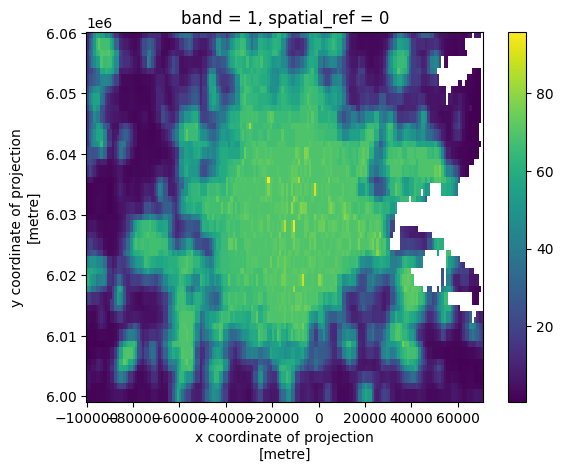

In [19]:
# London: minx=-100000,maxx=70000,miny=6000000,maxy=6060000

gdp_2018.rio.clip_box(minx=-100000,maxx=70000,miny=6000000,maxy=6060000).plot()

### Further on, working with the reprojected data

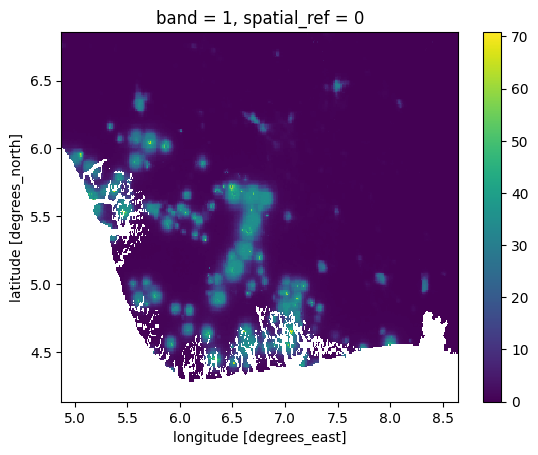

In [25]:
# west africa : minx=-1.703,maxx=8.646,miny=4.136,maxy=11.049

gdp_2018_lonlat.rio.clip_box(minx=4.878,maxx=8.646,miny=4.136,maxy=6.850).plot()